<a href="https://colab.research.google.com/github/Aswinpt2004/Data-analytics-pollution-prediction/blob/main/DA_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install numpy==1.23.5 tensorflow==2.12.0 --upgrade --force-reinstall

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 106.6 MB/s eta 0:00

In [ ]:
import pandas as pd


In [ ]:
pm25_path = '/content/drive/MyDrive/Colab Notebooks/openaq_combined_data.csv'
loc_path = '/content/drive/MyDrive/Colab Notebooks/locations.csv'

pm25_df = pd.read_csv(pm25_path)
loc_df = pd.read_csv(loc_path)

try:
    pm25_df = pd.read_csv(pm25_path)
    print("✅ PM2.5 Data Loaded")
    print("Shape:", pm25_df.shape)
    print(pm25_df.head())
except FileNotFoundError:
    print("❌ PM2.5 data file not found. Check the path.")

# Load the location data
try:
    loc_df = pd.read_csv(loc_path)
    print("\n✅ Location Data Loaded")
    print("Shape:", loc_df.shape)
    print(loc_df.head())
except FileNotFoundError:
    print("❌ Location data file not found. Check the path.")


✅ PM2.5 Data Loaded
Shape: (6076, 33)
   value  coordinates  sensor_id  flagInfo.hasFlags  parameter.id  \
0  101.0          NaN      23320              False             2   
1  103.0          NaN      23320              False             2   
2   92.9          NaN      23320              False             2   
3   89.8          NaN      23320              False             2   
4   81.3          NaN      23320              False             2   

  parameter.name parameter.units  parameter.displayName period.label  \
0           pm25           µg/m³                    NaN        1 day   
1           pm25           µg/m³                    NaN        1 day   
2           pm25           µg/m³                    NaN        1 day   
3           pm25           µg/m³                    NaN        1 day   
4           pm25           µg/m³                    NaN        1 day   

  period.interval  ... coverage.expectedCount coverage.expectedInterval  \
0        24:00:00  ...                 

**DATA SET MERGING**

In [ ]:
merged_df = pd.merge(pm25_df, loc_df, left_on='sensor_id', right_on='s_id', how='inner')

print("✅ Merged DataFrame created")
print("Shape:", merged_df.shape)
print(merged_df.head())


✅ Merged DataFrame created
Shape: (6076, 60)
   value  coordinates  sensor_id  flagInfo.hasFlags  parameter.id  \
0  101.0          NaN      23320              False             2   
1  103.0          NaN      23320              False             2   
2   92.9          NaN      23320              False             2   
3   89.8          NaN      23320              False             2   
4   81.3          NaN      23320              False             2   

  parameter.name parameter.units  parameter.displayName period.label  \
0           pm25           µg/m³                    NaN        1 day   
1           pm25           µg/m³                    NaN        1 day   
2           pm25           µg/m³                    NaN        1 day   
3           pm25           µg/m³                    NaN        1 day   
4           pm25           µg/m³                    NaN        1 day   

  period.interval  ...      datetimeLast.utc country.id country.code  \
0        24:00:00  ...  2025-03-04T

In [ ]:
# Drop duplicate key column 's_id' since 'sensor_id' is already present
merged_df = merged_df.drop(columns=['s_id'])

# Save merged dataframe to drive
merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/merged_pm25_location.csv', index=False)
print("Merged data saved!")


Merged data saved!


In [ ]:


# ✅ Print the shape of the merged dataset
print("Shape of merged dataset:", merged_df.shape)

# ✅ Print all column names (features)
print("\nFeatures in the merged dataset:")
for col in merged_df.columns:
    print("-", col)


Shape of merged dataset: (6076, 59)

Features in the merged dataset:
- value
- coordinates
- sensor_id
- flagInfo.hasFlags
- parameter.id
- parameter.name
- parameter.units
- parameter.displayName
- period.label
- period.interval
- period.datetimeFrom.utc
- period.datetimeFrom.local
- period.datetimeTo.utc
- period.datetimeTo.local
- summary.min
- summary.q02
- summary.q25
- summary.median
- summary.q75
- summary.q98
- summary.max
- summary.avg
- summary.sd
- coverage.expectedCount
- coverage.expectedInterval
- coverage.observedCount
- coverage.observedInterval
- coverage.percentComplete
- coverage.percentCoverage
- coverage.datetimeFrom.utc
- coverage.datetimeFrom.local
- coverage.datetimeTo.utc
- coverage.datetimeTo.local
- s_name
- s_parameter.id
- s_parameter.name
- s_parameter.units
- s_parameter.displayName
- id
- name
- locality
- timezone
- isMobile
- isMonitor
- licenses
- instruments
- bounds
- distance
- datetimeFirst.utc
- datetimeLast.utc
- country.id
- country.code
- coun

In [ ]:


# Drop truly identical (duplicated meaning) columns
columns_to_drop = [
    's_parameter.id',
    's_parameter.name',
    's_parameter.units',
    's_parameter.displayName'
]

merged_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:

print("✅ Cleaned merged data shape:", merged_df.shape)
print("📌 Remaining columns:")

for col in merged_df.columns:
    print("-", col)

✅ Cleaned merged data shape: (6076, 55)
📌 Remaining columns:
- value
- coordinates
- sensor_id
- flagInfo.hasFlags
- parameter.id
- parameter.name
- parameter.units
- parameter.displayName
- period.label
- period.interval
- period.datetimeFrom.utc
- period.datetimeFrom.local
- period.datetimeTo.utc
- period.datetimeTo.local
- summary.min
- summary.q02
- summary.q25
- summary.median
- summary.q75
- summary.q98
- summary.max
- summary.avg
- summary.sd
- coverage.expectedCount
- coverage.expectedInterval
- coverage.observedCount
- coverage.observedInterval
- coverage.percentComplete
- coverage.percentCoverage
- coverage.datetimeFrom.utc
- coverage.datetimeFrom.local
- coverage.datetimeTo.utc
- coverage.datetimeTo.local
- s_name
- id
- name
- locality
- timezone
- isMobile
- isMonitor
- licenses
- instruments
- bounds
- distance
- datetimeFirst.utc
- datetimeLast.utc
- country.id
- country.code
- country.name
- owner.id
- owner.name
- provider.id
- provider.name
- coordinates.latitude
- co

In [ ]:
columns_to_drop = [
    'coordinates',
    'flagInfo.hasFlags', 'parameter.units', 'parameter.displayName',
    'period.label', 'period.interval',
    'coverage.expectedCount', 'coverage.expectedInterval',
    'coverage.observedCount', 'coverage.observedInterval',
    'coverage.percentComplete', 'coverage.percentCoverage',
    'coverage.datetimeFrom.utc', 'coverage.datetimeFrom.local',
    'coverage.datetimeTo.utc', 'coverage.datetimeTo.local', 's_name', 'id',
    'isMobile', 'isMonitor', 'licenses', 'instruments', 'bounds', 'distance',
    'datetimeFirst.utc', 'datetimeLast.utc',
    'country.id', 'country.code', 'country.name', 'owner.id', 'owner.name',
    'provider.id', 'provider.name','parameter.id','parameter.name'
]

cleaned_df = merged_df.drop(columns=columns_to_drop)


In [ ]:
for col in cleaned_df.columns:
    print("-", col)

- value
- sensor_id
- period.datetimeFrom.utc
- period.datetimeFrom.local
- period.datetimeTo.utc
- period.datetimeTo.local
- summary.min
- summary.q02
- summary.q25
- summary.median
- summary.q75
- summary.q98
- summary.max
- summary.avg
- summary.sd
- name
- locality
- timezone
- coordinates.latitude
- coordinates.longitude


In [ ]:
import pandas as pd

# Convert to datetime if not already
cleaned_df['period.datetimeFrom.utc'] = pd.to_datetime(cleaned_df['period.datetimeFrom.utc'])

# Extract features
cleaned_df['hour'] = cleaned_df['period.datetimeFrom.utc'].dt.hour
cleaned_df['dayofweek'] = cleaned_df['period.datetimeFrom.utc'].dt.dayofweek
cleaned_df['month'] = cleaned_df['period.datetimeFrom.utc'].dt.month


In [ ]:

import pandas as pd

# Convert datetime columns to pandas datetime if not already
cleaned_df['period.datetimeFrom.local'] = pd.to_datetime(cleaned_df['period.datetimeFrom.local'])

# ✅ Extract datetime features
cleaned_df['hour'] = cleaned_df['period.datetimeFrom.local'].dt.hour
cleaned_df['dayofweek'] = cleaned_df['period.datetimeFrom.local'].dt.dayofweek  # Monday=0, Sunday=6
cleaned_df['month'] = cleaned_df['period.datetimeFrom.local'].dt.month

# ✅ Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder_sensor = LabelEncoder()
cleaned_df['sensor_id_encoded'] = label_encoder_sensor.fit_transform(cleaned_df['sensor_id'])

label_encoder_name = LabelEncoder()
cleaned_df['station_name_encoded'] = label_encoder_name.fit_transform(cleaned_df['name'])

# ✅ Show updated columns
print("🧾 Updated columns:\n", cleaned_df[['hour', 'dayofweek', 'month', 'sensor_id', 'sensor_id_encoded', 'name', 'station_name_encoded']].head())


🧾 Updated columns:
    hour  dayofweek  month  sensor_id  sensor_id_encoded    name  \
0     0          2      1      23320                  0  Mumbai   
1     0          3      1      23320                  0  Mumbai   
2     0          4      1      23320                  0  Mumbai   
3     0          5      1      23320                  0  Mumbai   
4     0          6      1      23320                  0  Mumbai   

   station_name_encoded  
0                     2  
1                     2  
2                     2  
3                     2  
4                     2  


In [ ]:
def classify_columns(cleaned_df):
    qualitative = list(cleaned_df.select_dtypes(include=['object']).columns)  # Categorical columns
    quantitative = list(cleaned_df.select_dtypes(include=['number']).columns)  # Numerical columns

    return qualitative, quantitative

# Example usage
qualitative_cols, quantitative_cols = classify_columns(cleaned_df)  # Change dataset name accordingly

print("Qualitative (Categorical) Columns:", qualitative_cols)
print("Quantitative (Numerical) Columns:", quantitative_cols)


Qualitative (Categorical) Columns: ['period.datetimeTo.utc', 'period.datetimeTo.local', 'name', 'locality', 'timezone']
Quantitative (Numerical) Columns: ['value', 'sensor_id', 'summary.min', 'summary.q02', 'summary.q25', 'summary.median', 'summary.q75', 'summary.q98', 'summary.max', 'summary.avg', 'summary.sd', 'coordinates.latitude', 'coordinates.longitude', 'hour', 'dayofweek', 'month', 'sensor_id_encoded', 'station_name_encoded']


In [ ]:
# Show total null values per column
null_counts = cleaned_df.isnull().sum()

# Show percentage of null values per column
null_percent = (null_counts / len(cleaned_df)) * 100

# Combine into a readable DataFrame
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percent.round(2)
})

# Display only columns with nulls
null_summary = null_summary[null_summary['Null Count'] > 0]

print("🧾 Null Values Summary:")
print(null_summary if not null_summary.empty else "No missing values found!")


🧾 Null Values Summary:
            Null Count  Null Percentage (%)
summary.sd           9                 0.15


In [ ]:
cleaned_df[cleaned_df.isnull().any(axis=1)]


,value,sensor_id,period.datetimeFrom.utc,period.datetimeFrom.local,period.datetimeTo.utc,period.datetimeTo.local,summary.min,summary.q02,summary.q25,summary.median,...,name,locality,timezone,coordinates.latitude,coordinates.longitude,hour,dayofweek,month,sensor_id_encoded,station_name_encoded
411,85.0,23320,2021-02-19 18:30:00+00:00,2021-02-20 00:00:00+05:30,2021-02-20T18:30:00Z,2021-02-21T00:00:00+05:30,85.0,85.0,85.0,85.0,...,Mumbai,India,Asia/Kolkata,19.07283,72.88261,0,5,2,0,2
542,17.0,23320,2021-07-06 18:30:00+00:00,2021-07-07 00:00:00+05:30,2021-07-07T18:30:00Z,2021-07-08T00:00:00+05:30,17.0,17.0,17.0,17.0,...,Mumbai,India,Asia/Kolkata,19.07283,72.88261,0,2,7,0,2
1085,112.0,23320,2023-01-11 18:30:00+00:00,2023-01-12 00:00:00+05:30,2023-01-12T18:30:00Z,2023-01-13T00:00:00+05:30,112.0,112.0,112.0,112.0,...,Mumbai,India,Asia/Kolkata,19.07283,72.88261,0,3,1,0,2
2352,76.0,23534,2021-06-29 18:30:00+00:00,2021-06-30 00:00:00+05:30,2021-06-30T18:30:00Z,2021-07-01T00:00:00+05:30,76.0,76.0,76.0,76.0,...,New Delhi,India,Asia/Kolkata,28.63576,77.22445,0,2,6,1,3
2363,26.0,23534,2021-07-11 18:30:00+00:00,2021-07-12 00:00:00+05:30,2021-07-12T18:30:00Z,2021-07-13T00:00:00+05:30,26.0,26.0,26.0,26.0,...,New Delhi,India,Asia/Kolkata,28.63576,77.22445,0,0,7,1,3
2903,200.0,23534,2023-01-11 18:30:00+00:00,2023-01-12 00:00:00+05:30,2023-01-12T18:30:00Z,2023-01-13T00:00:00+05:30,200.0,200.0,200.0,200.0,...,New Delhi,India,Asia/Kolkata,28.63576,77.22445,0,3,1,1,3
3791,18.0,24857,2020-06-06 18:30:00+00:00,2020-06-07 00:00:00+05:30,2020-06-07T18:30:00Z,2020-06-08T00:00:00+05:30,18.0,18.0,18.0,18.0,...,Hyderabad,India,Asia/Kolkata,17.38405,78.45636,0,6,6,2,1
4429,68.0,24857,2022-03-22 18:30:00+00:00,2022-03-23 00:00:00+05:30,2022-03-23T18:30:00Z,2022-03-24T00:00:00+05:30,68.0,68.0,68.0,68.0,...,Hyderabad,India,Asia/Kolkata,17.38405,78.45636,0,2,3,2,1
4724,128.0,24857,2023-01-11 18:30:00+00:00,2023-01-12 00:00:00+05:30,2023-01-12T18:30:00Z,2023-01-13T00:00:00+05:30,128.0,128.0,128.0,128.0,...,Hyderabad,India,Asia/Kolkata,17.38405,78.45636,0,3,1,2,1


In [ ]:
cleaned_df['summary.sd'] = cleaned_df['summary.sd'].fillna(cleaned_df['summary.sd'].mean())


In [ ]:

# Show total null values per column
null_counts = cleaned_df.isnull().sum()

# Show percentage of null values per column
null_percent = (null_counts / len(cleaned_df)) * 100

# Combine into a readable DataFrame
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percent.round(2)
})

# Display only columns with nulls
null_summary = null_summary[null_summary['Null Count'] > 0]

print("🧾 Null Values Summary:")
print(null_summary if not null_summary.empty else "No missing values found!")


🧾 Null Values Summary:
No missing values found!


Outline the descriptive overview of the dataset to perform the statistical analysis of the data.

In [ ]:
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6076 entries, 0 to 6075
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype                    
---  ------                     --------------  -----                    
 0   value                      6076 non-null   float64                  
 1   sensor_id                  6076 non-null   int64                    
 2   period.datetimeFrom.utc    6076 non-null   datetime64[ns, UTC]      
 3   period.datetimeFrom.local  6076 non-null   datetime64[ns, UTC+05:30]
 4   period.datetimeTo.utc      6076 non-null   object                   
 5   period.datetimeTo.local    6076 non-null   object                   
 6   summary.min                6076 non-null   float64                  
 7   summary.q02                6076 non-null   float64                  
 8   summary.q25                6076 non-null   float64                  
 9   summary.median             6076 non-null   float64                  
 10  

In [ ]:
cleaned_df.describe()


,value,sensor_id,summary.min,summary.q02,summary.q25,summary.median,summary.q75,summary.q98,summary.max,summary.avg,summary.sd,coordinates.latitude,coordinates.longitude,hour,dayofweek,month,sensor_id_encoded,station_name_encoded
count,6076.000000,6.076000e+03,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.000000,6076.0,6076.000000,6076.000000,6076.000000,6076.000000
mean,-43.165095,5.412729e+05,-239.609217,-194.563039,-71.733402,-31.277140,0.030814,36.450011,41.905826,-43.165946,84.165798,20.815337,76.609320,0.0,2.992923,6.477617,1.205727,1.794766
std,278.472419,1.532139e+06,458.748395,409.434982,332.309652,295.453877,273.500118,260.980450,261.491469,278.467828,139.611708,5.371472,2.581400,0.0,1.995992,3.491647,0.982718,0.983073
min,-999.000000,2.332000e+04,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,13.087840,72.882610,0.0,0.000000,1.000000,0.000000,0.000000
25%,6.935000,2.332000e+04,-999.000000,-508.295000,11.000000,15.500000,21.000000,30.845000,32.000000,6.932292,7.197681,17.384050,72.882610,0.0,1.000000,3.000000,0.000000,1.000000
50%,30.600000,2.353400e+04,15.000000,15.460000,27.000000,35.500000,45.000000,62.050000,64.000000,30.629167,16.332424,19.072830,77.224450,0.0,3.000000,7.000000,1.000000,2.000000
75%,69.000000,2.485700e+04,38.000000,38.445000,54.750000,69.500000,85.250000,113.785000,118.000000,68.956975,63.036980,28.635760,78.456360,0.0,5.000000,10.000000,2.000000,3.000000
max,665.000000,5.077812e+06,479.000000,481.760000,574.000000,609.000000,775.500000,992.640000,1000.000000,665.125000,840.446862,28.635760,80.278475,0.0,6.000000,12.000000,3.000000,3.000000


In [ ]:
cleaned_df.describe(include=['object'])


,period.datetimeTo.utc,period.datetimeTo.local,name,locality,timezone
count,6076,6076,6076,6076,6076
unique,1822,1822,4,1,1
top,2024-02-10T18:30:00Z,2024-02-11T00:00:00+05:30,Hyderabad,India,Asia/Kolkata
freq,4,4,1821,6076,6076


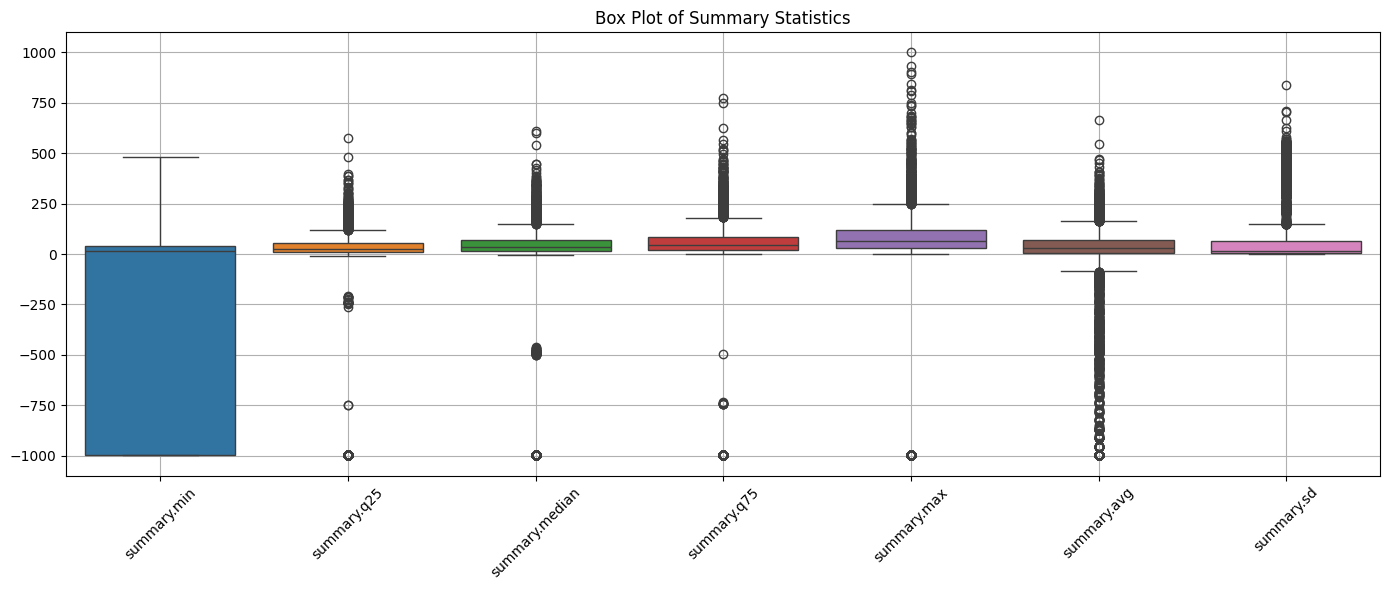

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for distribution visualization
numeric_cols = ['summary.min', 'summary.q25', 'summary.median',
                'summary.q75', 'summary.max', 'summary.avg', 'summary.sd']

# Plot boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(data=cleaned_df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Summary Statistics")
plt.grid(True)
plt.tight_layout()
plt.show()



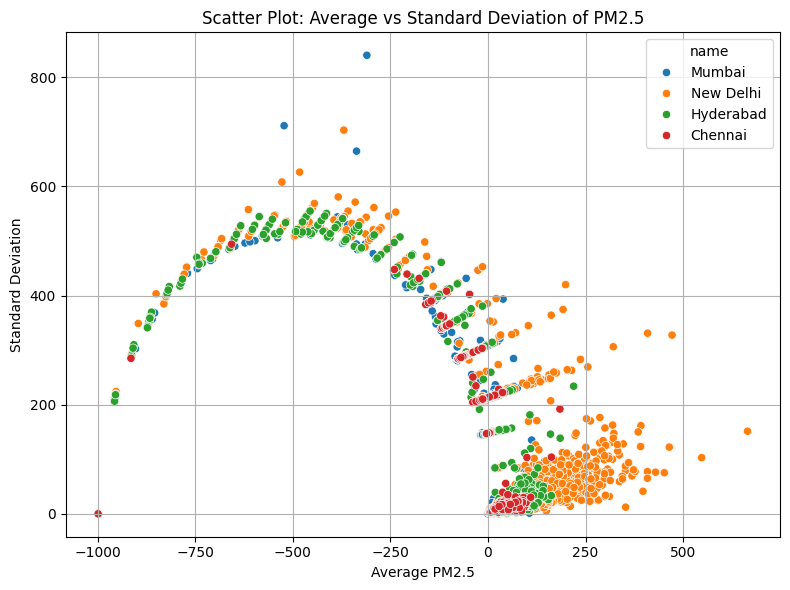

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='summary.avg', y='summary.sd', data=cleaned_df, hue='name')
plt.title('Scatter Plot: Average vs Standard Deviation of PM2.5')
plt.xlabel('Average PM2.5')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.tight_layout()
plt.show()


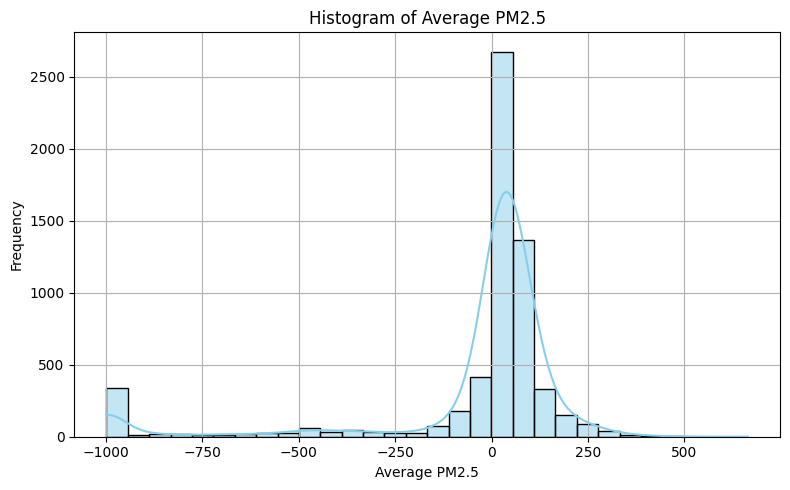

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(cleaned_df['summary.avg'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Average PM2.5")
plt.xlabel("Average PM2.5")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-25-5292ec30ff9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_location.index, y=avg_by_location.values, palette='viridis')


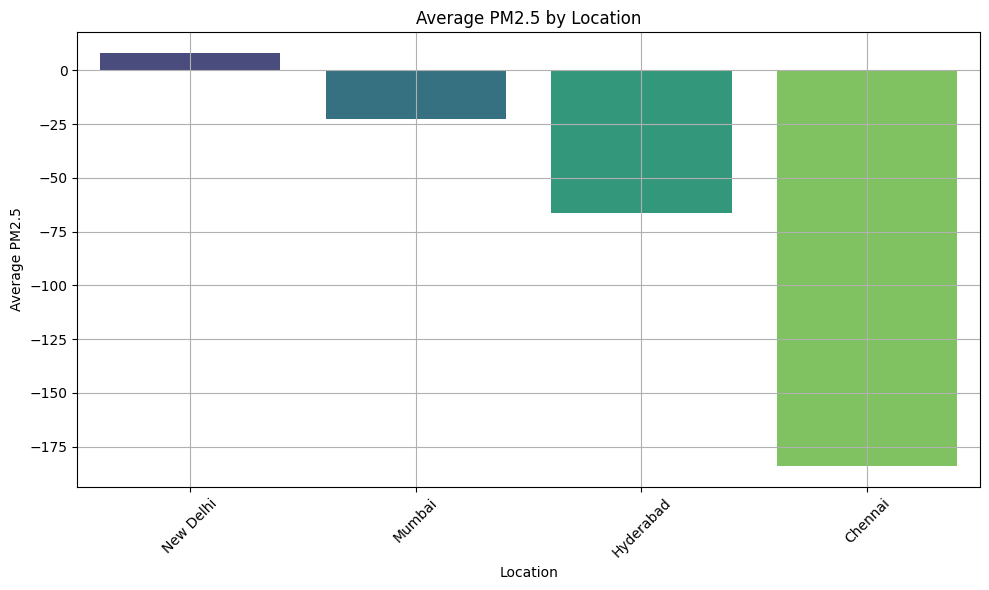

In [ ]:
plt.figure(figsize=(10, 6))
avg_by_location = cleaned_df.groupby('name')['summary.avg'].mean().sort_values(ascending=False)
sns.barplot(x=avg_by_location.index, y=avg_by_location.values, palette='viridis')
plt.title("Average PM2.5 by Location")
plt.xlabel("Location")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


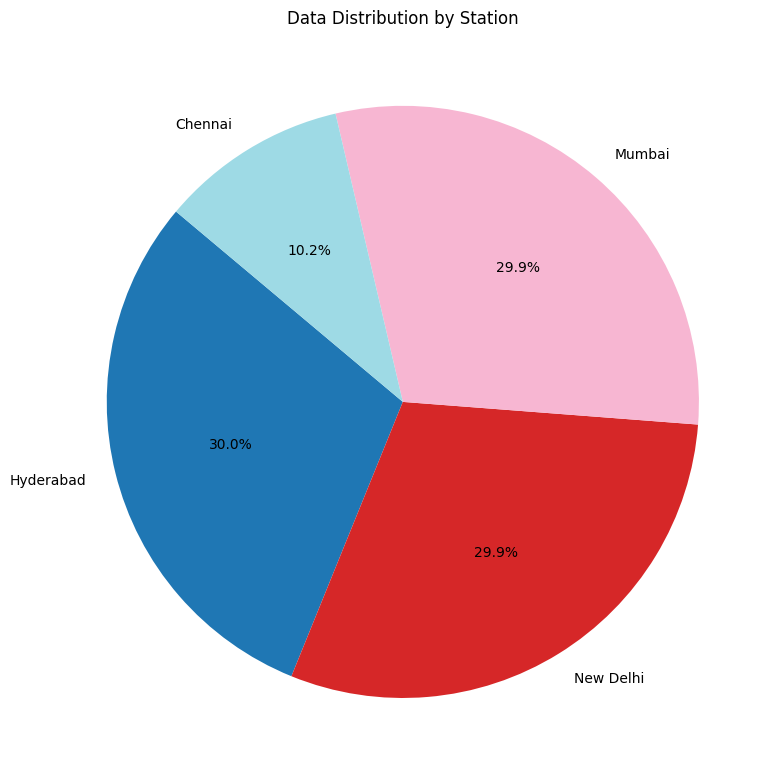

In [ ]:
plt.figure(figsize=(8, 8))
station_counts = cleaned_df['name'].value_counts()
station_counts.plot.pie(autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title("Data Distribution by Station")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Select only numeric columns for normalization
numeric_cols = [
    'summary.min', 'summary.q02', 'summary.q25', 'summary.median',
    'summary.q75', 'summary.q98', 'summary.max', 'summary.avg', 'summary.sd'
]

# Create new DataFrames for each scaling method
minmax_scaled_df = cleaned_df.copy()
zscore_scaled_df = cleaned_df.copy()
decimal_scaled_df = cleaned_df.copy()

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
minmax_scaled_df[numeric_cols] = minmax_scaler.fit_transform(cleaned_df[numeric_cols])

# Z-Score Standardization
zscore_scaler = StandardScaler()
zscore_scaled_df[numeric_cols] = zscore_scaler.fit_transform(cleaned_df[numeric_cols])

# Decimal Scaling (custom implementation)
def decimal_scaling(series):
    max_abs = series.abs().max()
    scaling_factor = 10 ** len(str(int(max_abs)))
    return series / scaling_factor

for col in numeric_cols:
    decimal_scaled_df[col] = decimal_scaling(cleaned_df[col])



In [ ]:
print("🔹 Min-Max Scaled Data (0 to 1):")
print(minmax_scaled_df[numeric_cols].head())

print("\n🔹 Z-Score Standardized Data (mean=0, std=1):")
print(zscore_scaled_df[numeric_cols].head())

print("\n🔹 Decimal Scaled Data:")
print(decimal_scaled_df[numeric_cols].head())



🔹 Min-Max Scaled Data (0 to 1):
   summary.min  summary.q02  summary.q25  summary.median  summary.q75  \
0     0.713802     0.717132     0.688334        0.680037     0.631727   
1     0.702977     0.701667     0.687063        0.687811     0.636940   
2     0.720568     0.719225     0.685791        0.678794     0.621020   
3     0.714479     0.713147     0.679593        0.680037     0.619189   
4     0.703654     0.702342     0.672918        0.666045     0.620879   

   summary.q98  summary.max  summary.avg  summary.sd  
0     0.574682     0.575788     0.661008    0.030465  
1     0.580085     0.579790     0.662185    0.043607  
2     0.562853     0.560780     0.656151    0.020462  
3     0.564861     0.562781     0.654248    0.024516  
4     0.565865     0.563782     0.649165    0.035904  

🔹 Z-Score Standardized Data (mean=0, std=1):
   summary.min  summary.q02  summary.q25  summary.median  summary.q75  \
0     0.644435     0.628877     0.467926        0.425743     0.445993   
1     0

Explained Variance Ratio of Top 5 Principal Components:
PC1: 0.6947
PC2: 0.2283
PC3: 0.0481
PC4: 0.0149
PC5: 0.0070


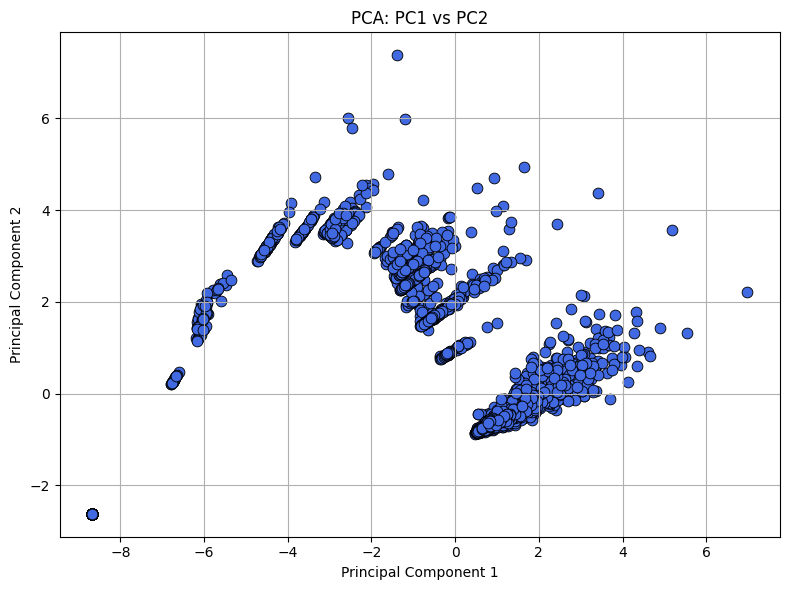

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only the numeric columns from the Z-score standardized DataFrame
numeric_cols = [
    'summary.min', 'summary.q02', 'summary.q25', 'summary.median',
    'summary.q75', 'summary.q98', 'summary.max', 'summary.avg', 'summary.sd'
]

# Step 1: Perform PCA (top 5 components)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(zscore_scaled_df[numeric_cols])

# Step 2: Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of Top 5 Principal Components:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.4f}")

# Step 3: Create a DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i}" for i in range(1, 6)])

# Step 4: Plot scatter plot of PC1 vs PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", s=60, color="royalblue", edgecolor="black")
plt.title("PCA: PC1 vs PC2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


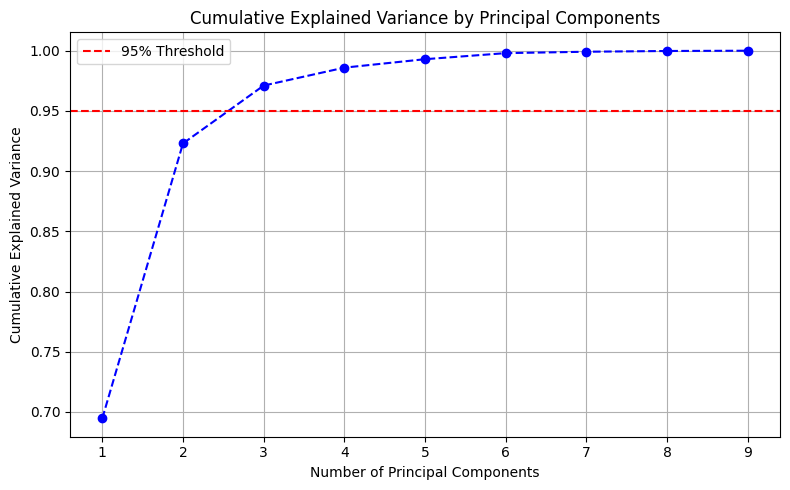


✅ Number of Principal Components needed to explain at least 95% variance: 3


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Use z-score standardized data (zscore_scaled_df)
X = zscore_scaled_df[numeric_cols]

# Step 2: Fit PCA with all components
pca_full = PCA()
pca_full.fit(X)

# Step 3: Compute cumulative explained variance
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Step 4: Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print the number of components needed for 95%
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"\n✅ Number of Principal Components needed to explain at least 95% variance: {n_components_95}")


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Assume we already determined the optimal number of components, say 3 (adjust if needed)
optimal_n_components = 5

# Step 1: Fit PCA with optimal number of components
pca_optimal = PCA(n_components=optimal_n_components)
transformed_data = pca_optimal.fit_transform(zscore_scaled_df[numeric_cols])

# Step 2: Convert to a DataFrame
pca_columns = [f'PC{i+1}' for i in range(optimal_n_components)]
pca_transformed_df = pd.DataFrame(transformed_data, columns=pca_columns)

# Step 3: Display the transformed dataset
print("\n🔹 Transformed Dataset using Top Principal Components:")
print(pca_transformed_df.head())



🔹 Transformed Dataset using Top Principal Components:
        PC1       PC2       PC3       PC4       PC5
0  1.430602 -0.370560 -0.146101  0.002769 -0.018418
1  1.444711 -0.248311 -0.135178  0.022134 -0.000450
2  1.334005 -0.503333 -0.098236  0.034389  0.000349
3  1.311390 -0.462117 -0.112979  0.034585  0.023796
4  1.236744 -0.388047 -0.153485  0.018937 -0.024305


In [ ]:
from sklearn.metrics import mean_squared_error

# Step 4: Reconstruct the scaled dataset from principal components
reconstructed_scaled_data = pca_optimal.inverse_transform(pca_transformed_df.values)

# Convert back to DataFrame for easier viewing
reconstructed_scaled_df = pd.DataFrame(reconstructed_scaled_data, columns=numeric_cols)

# Step 5: Calculate reconstruction error (MSE)
mse = mean_squared_error(zscore_scaled_df[numeric_cols], reconstructed_scaled_df)
print(f"\nReconstruction Mean Squared Error: {mse}")

# Step 6: Display first 5 rows of the reconstructed dataset
print("\n🔹 Reconstructed Scaled Dataset (first 5 rows):")
print(reconstructed_scaled_df.head())



Reconstruction Mean Squared Error: 0.0070477423468674714

🔹 Reconstructed Scaled Dataset (first 5 rows):
   summary.min  summary.q02  summary.q25  summary.median  summary.q75  \
0     0.637239     0.643647     0.466635        0.426302     0.441079   
1     0.592859     0.598012     0.455560        0.469021     0.473812   
2     0.649935     0.647944     0.447565        0.421510     0.379339   
3     0.635955     0.626630     0.423332        0.427894     0.365677   
4     0.593537     0.590121     0.386885        0.352863     0.378631   

   summary.q98  summary.max  summary.avg  summary.sd  
0     0.421856     0.413700     0.521608   -0.412379  
1     0.457401     0.449283     0.533131   -0.333464  
2     0.325002     0.313858     0.487308   -0.487868  
3     0.336387     0.328647     0.474895   -0.456078  
4     0.346770     0.337744     0.443702   -0.394142  


**Hypothesis Testing**

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. List all unique stations
stations = cleaned_df['name'].unique()
print("Stations present in dataset:", stations)

# 2. Prepare data for ANOVA
station_data = [cleaned_df[cleaned_df['name'] == station]['summary.avg'].dropna() for station in stations]

# 3. Perform One-Way ANOVA
f_stat, p_value = f_oneway(*station_data)
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA p-value: {p_value:.4e}")

# 4. Interpretation of ANOVA
alpha = 0.05
if p_value < alpha:
    print(" Reject NullC: At least one station has significantly different PM2.5 levels.")

    # 5. Perform Tukey's HSD post-hoc test to find which stations differ
    tukey = pairwise_tukeyhsd(endog=cleaned_df['summary.avg'],
                              groups=cleaned_df['name'],
                              alpha=0.05)
    print("\nTukey's HSD post-hoc test results:")
    print(tukey.summary())
else:
    print(" Fail to reject Null Hypothesis: No significant difference among stations.")


Stations present in dataset: ['Mumbai' 'New Delhi' 'Hyderabad' 'Chennai']
ANOVA F-statistic: 84.2573
ANOVA p-value: 2.0854e-53
 Reject NullC: At least one station has significantly different PM2.5 levels.

Tukey's HSD post-hoc test results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
  Chennai Hyderabad 117.4484    0.0  84.8777 150.0191   True
  Chennai    Mumbai 161.0957    0.0 128.5113 193.6801   True
  Chennai New Delhi 191.9445    0.0 159.3669  224.522   True
Hyderabad    Mumbai  43.6473    0.0   20.386  66.9086   True
Hyderabad New Delhi  74.4961    0.0  51.2444  97.7477   True
   Mumbai New Delhi  30.8487 0.0037   7.5779  54.1196   True
------------------------------------------------------------


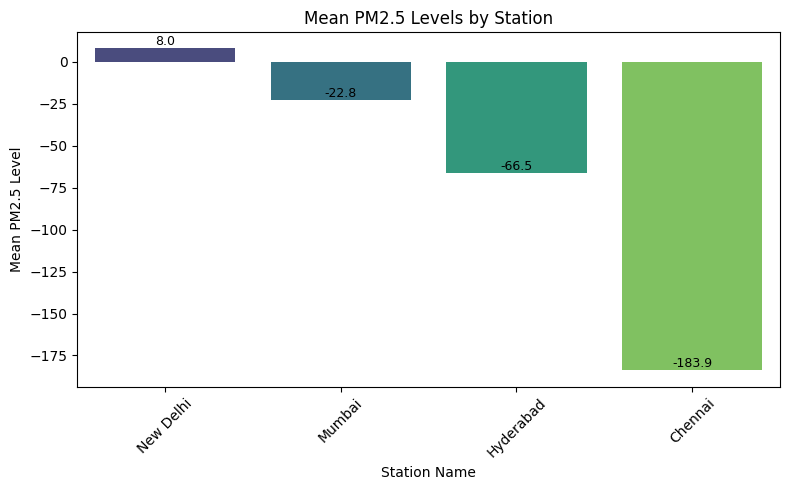

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Step 1: Calculate mean PM2.5 values by station
mean_pm25 = cleaned_df.groupby("name")["value"].mean().reset_index()

# ✅ Step 2: Sort values
mean_pm25 = mean_pm25.sort_values(by='value', ascending=False)

# ✅ Step 3: Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='name', y='value', hue='name', data=mean_pm25, palette='viridis', legend=False)

# ✅ Step 4: Annotate bar tops with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

# ✅ Step 5: Labels and style
plt.xlabel('Station Name')
plt.ylabel('Mean PM2.5 Level')
plt.title('Mean PM2.5 Levels by Station')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-35-0482e41b18d8>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cleaned_df['month'] = cleaned_df['period.datetimeFrom.utc'].dt.to_period('M')


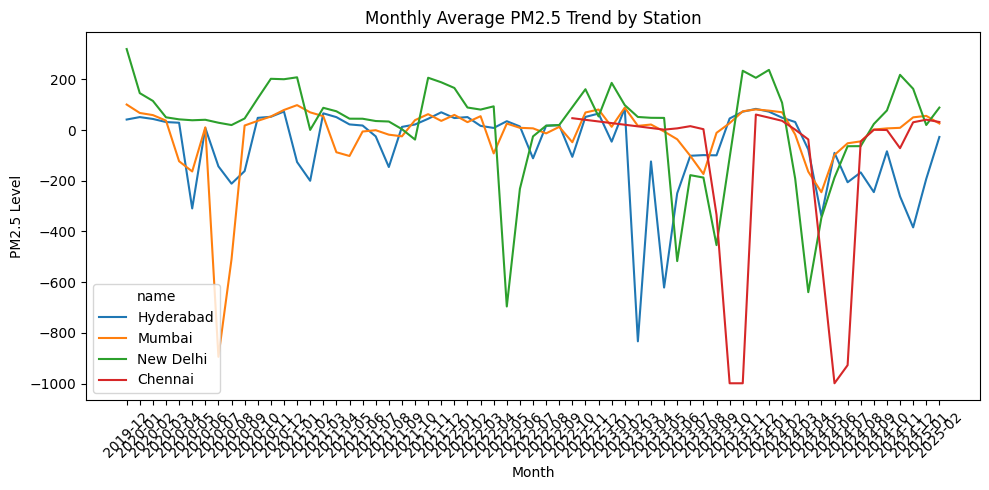

In [ ]:
# Example: Monthly PM2.5 trend
cleaned_df['period.datetimeFrom.utc'] = pd.to_datetime(cleaned_df['period.datetimeFrom.utc'])  # Ensure datetime format
cleaned_df['month'] = cleaned_df['period.datetimeFrom.utc'].dt.to_period('M')

monthly_trend = cleaned_df.groupby(['month', 'name'])['value'].mean().reset_index()
monthly_trend['month'] = monthly_trend['month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='month', y='value', hue='name')
plt.xticks(rotation=45)
plt.title('Monthly Average PM2.5 Trend by Station')
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.tight_layout()
plt.show()


<ipython-input-36-ebd0a77ac507>:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cleaned_df['month'] = cleaned_df['period.datetimeFrom.local'].dt.to_period('M')


🔹 Full Monthly PM2.5 Table (μg/m³):
name     Chennai  Hyderabad  Mumbai  New Delhi
month                                         
2020-01      NaN      51.55   67.96     153.10
2020-02      NaN      44.05   60.77     117.50
2020-03      NaN      31.66   38.22      50.80
2020-04      NaN      29.99 -122.27      41.73
2020-05      NaN    -308.89 -163.25      39.49
2020-06      NaN       9.11   11.40      40.56
2020-07      NaN    -138.05 -864.34      29.86
2020-08      NaN    -184.11 -527.21      20.25
2020-09      NaN    -196.13   17.96      44.63
2020-10      NaN      47.27   35.80     119.05
2020-11      NaN      52.68   53.13     203.86
2020-12      NaN      71.88   77.58     194.98
2021-01      NaN     -89.76   99.50     210.78
2021-02      NaN    -238.20   71.00       9.86
2021-03      NaN      66.22   56.11      88.76
2021-04      NaN      52.21  -86.54      72.70
2021-05      NaN      23.72 -101.95      48.07
2021-06      NaN      18.29   -5.19      44.40
2021-07      NaN     -22

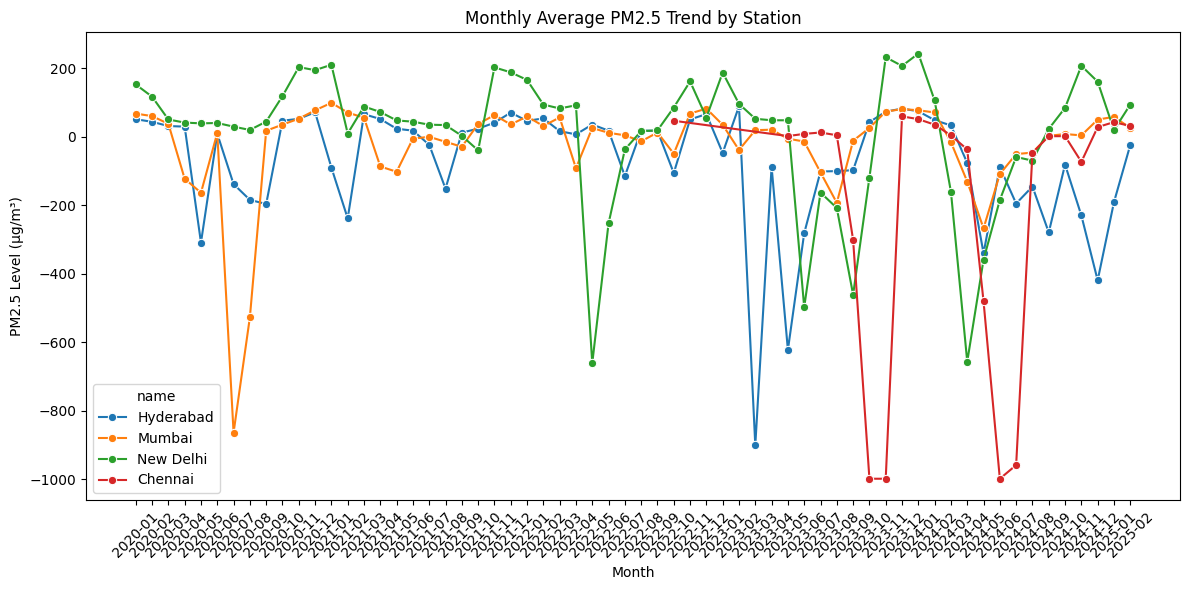

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime column is in correct format
cleaned_df['period.datetimeFrom.local'] = pd.to_datetime(cleaned_df['period.datetimeFrom.local'])

# Extract 'month' from datetime
cleaned_df['month'] = cleaned_df['period.datetimeFrom.local'].dt.to_period('M')

# Group by month and station name to compute monthly average PM2.5
monthly_trend = cleaned_df.groupby(['month', 'name'])['value'].mean().reset_index()
monthly_trend['month'] = monthly_trend['month'].astype(str)

# Pivot to wide format table
monthly_pivot = monthly_trend.pivot(index='month', columns='name', values='value').round(2)

# 🔍 Ensure full table display (no row/column truncation)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 🧾 Display full table
print("🔹 Full Monthly PM2.5 Table (μg/m³):")
print(monthly_pivot)

# 📊 Plot monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='value', hue='name', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Average PM2.5 Trend by Station')
plt.xlabel('Month')
plt.ylabel('PM2.5 Level (μg/m³)')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Option 1: Replace negative values with NaN
cleaned_df['value'] = cleaned_df['value'].apply(lambda x: x if x >= 0 else np.nan)


In [ ]:
cleaned_df['month'] = cleaned_df['period.datetimeFrom.local'].dt.to_period('M')
monthly_trend = cleaned_df.groupby(['month', 'name'])['value'].mean().reset_index()
monthly_trend['month'] = monthly_trend['month'].astype(str)
monthly_pivot = monthly_trend.pivot(index='month', columns='name', values='value')


<ipython-input-38-1b7f042995ec>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cleaned_df['month'] = cleaned_df['period.datetimeFrom.local'].dt.to_period('M')


✅ Cleaned Monthly PM2.5 Table (μg/m³):
name       Chennai  Hyderabad  Mumbai   New Delhi
month                                            
2020-01          -      54.16   70.53  153.096774
2020-02          -      46.05   87.04  117.503448
2020-03          -      34.57   48.18   54.663333
2020-04          -      31.04   28.29   41.734483
2020-05          -      26.32   16.44       50.61
2020-06          -      13.32   16.17   42.344828
2020-07          -      11.43   10.91   29.858065
2020-08          -      10.22    6.74   20.247931
2020-09          -      16.05   17.96   44.633333
2020-10          -      49.24   37.34  119.054839
2020-11          -      54.71   68.28      203.86
2020-12          -      82.11   77.58  194.983333
2021-01          -      72.19   99.50  210.783871
2021-02          -      72.71   71.00  156.458333
2021-03          -      66.22   56.11   88.764516
2021-04          -      52.21   28.84   72.703571
2021-05          -      23.72   18.18   48.068966
2021-06    

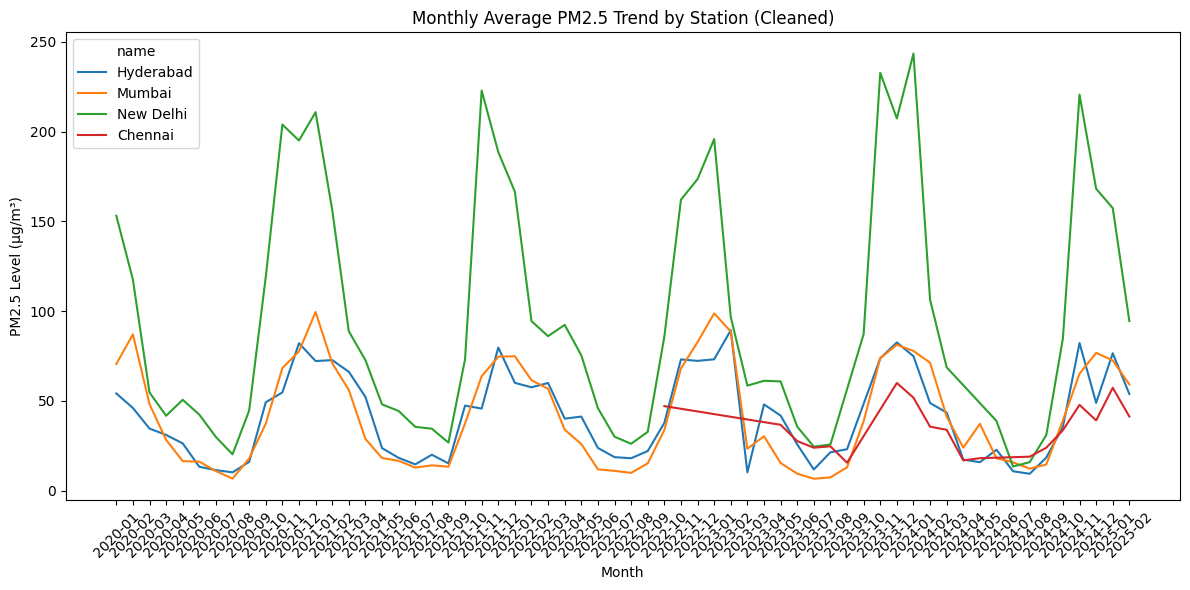

In [ ]:
# Print clean table
print("✅ Cleaned Monthly PM2.5 Table (μg/m³):")
print(monthly_pivot.fillna("-").round(2))  # Replace NaNs with "-" for display

# Plot again
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='value', hue='name')
plt.xticks(rotation=45)
plt.title('Monthly Average PM2.5 Trend by Station (Cleaned)')
plt.xlabel('Month')
plt.ylabel('PM2.5 Level (μg/m³)')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Step 1: Define a function to convert PM2.5 values into categories
def categorize_pm25(pm):
    if pm <= 50:
        return 'Good'
    elif pm <= 100:
        return 'Moderate'
    elif pm <= 150:
        return 'Unhealthy'
    elif pm <= 200:
        return 'Poor'
    else:
        return 'Very Poor'

# Step 2: Apply categorization to your dataset
cleaned_df['pm25_category'] = cleaned_df['value'].apply(categorize_pm25)

# Step 3: Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(cleaned_df['name'], cleaned_df['pm25_category'])

# Step 4: Run Chi-Square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Step 5: Display results
print(" Chi-Square Test Results")
print("--------------------------")
print(f"Chi-Square Statistic : {chi2_stat:.2f}")
print(f"Degrees of Freedom   : {dof}")
print(f"P-Value              : {p_value:.4f}")

# Optional: Print expected frequencies
print("\n📊 Expected Frequencies:")
expected_df = pd.DataFrame(expected_freq, index=contingency_table.index, columns=contingency_table.columns)
print(expected_df)

# Step 6: Interpret result
alpha = 0.05
if p_value < alpha:
    print("\n✅ Result: Reject the null hypothesis — Station and PM2.5 category ARE associated.")
else:
    print("\n❌ Result: Fail to reject the null hypothesis — No significant association.")


 Chi-Square Test Results
--------------------------
Chi-Square Statistic : 798.75
Degrees of Freedom   : 12
P-Value              : 0.0000

📊 Expected Frequencies:
pm25_category        Good    Moderate       Poor   Unhealthy   Very Poor
name                                                                    
Chennai        254.287031  146.593812  16.481567   40.333772  164.303818
Hyderabad      744.464121  429.175774  48.252304  118.083278  481.024523
Mumbai         742.011192  427.761685  48.093318  117.694207  479.439598
New Delhi      743.237656  428.468729  48.172811  117.888743  480.232061

✅ Result: Reject the null hypothesis — Station and PM2.5 category ARE associated.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Your observed contingency table
contingency_table = pd.crosstab(cleaned_df['name'],cleaned_df['value'])

# Perform chi-square test
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

# Put expected values into a DataFrame for easier comparison
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)

print("\n Expected Frequencies:")
print(expected_df.round(6))



 Expected Frequencies:
value       0.000     0.167     0.188     0.250     0.292     0.750     1.000     1.040     1.190     1.210     1.380     1.420     1.460     1.540     1.580     1.710     2.130     2.330     2.750     2.830     2.850     3.020     3.150     3.330     3.420     3.500     3.540     3.580     3.630     3.800     3.830     3.920     4.100     4.130     4.150     4.290     4.350     4.500     4.690     4.880     4.920     4.960     5.000     5.170     5.210     5.230     5.330     5.420     5.450     5.500     5.520     5.540     5.550     5.580     5.650     5.710     5.770     5.790     5.830     5.920     5.970     6.000     6.060     6.070     6.080     6.090     6.130     6.170     6.210     6.260     6.280     6.290     6.330     6.360     6.380     6.420     6.430     6.440     6.460     6.480     6.500     6.530     6.540     6.580     6.610     6.630     6.700     6.710     6.750     6.770     6.830     6.860     6.870     6.880     6.910     6.920     6.94

In [ ]:
import numpy as np

# Chi-square statistic and total observations
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()

# Cramér's V
phi2 = chi2_stat / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

print(f"Cramér’s V: {cramers_v:.4f}")


Cramér’s V: 0.5646


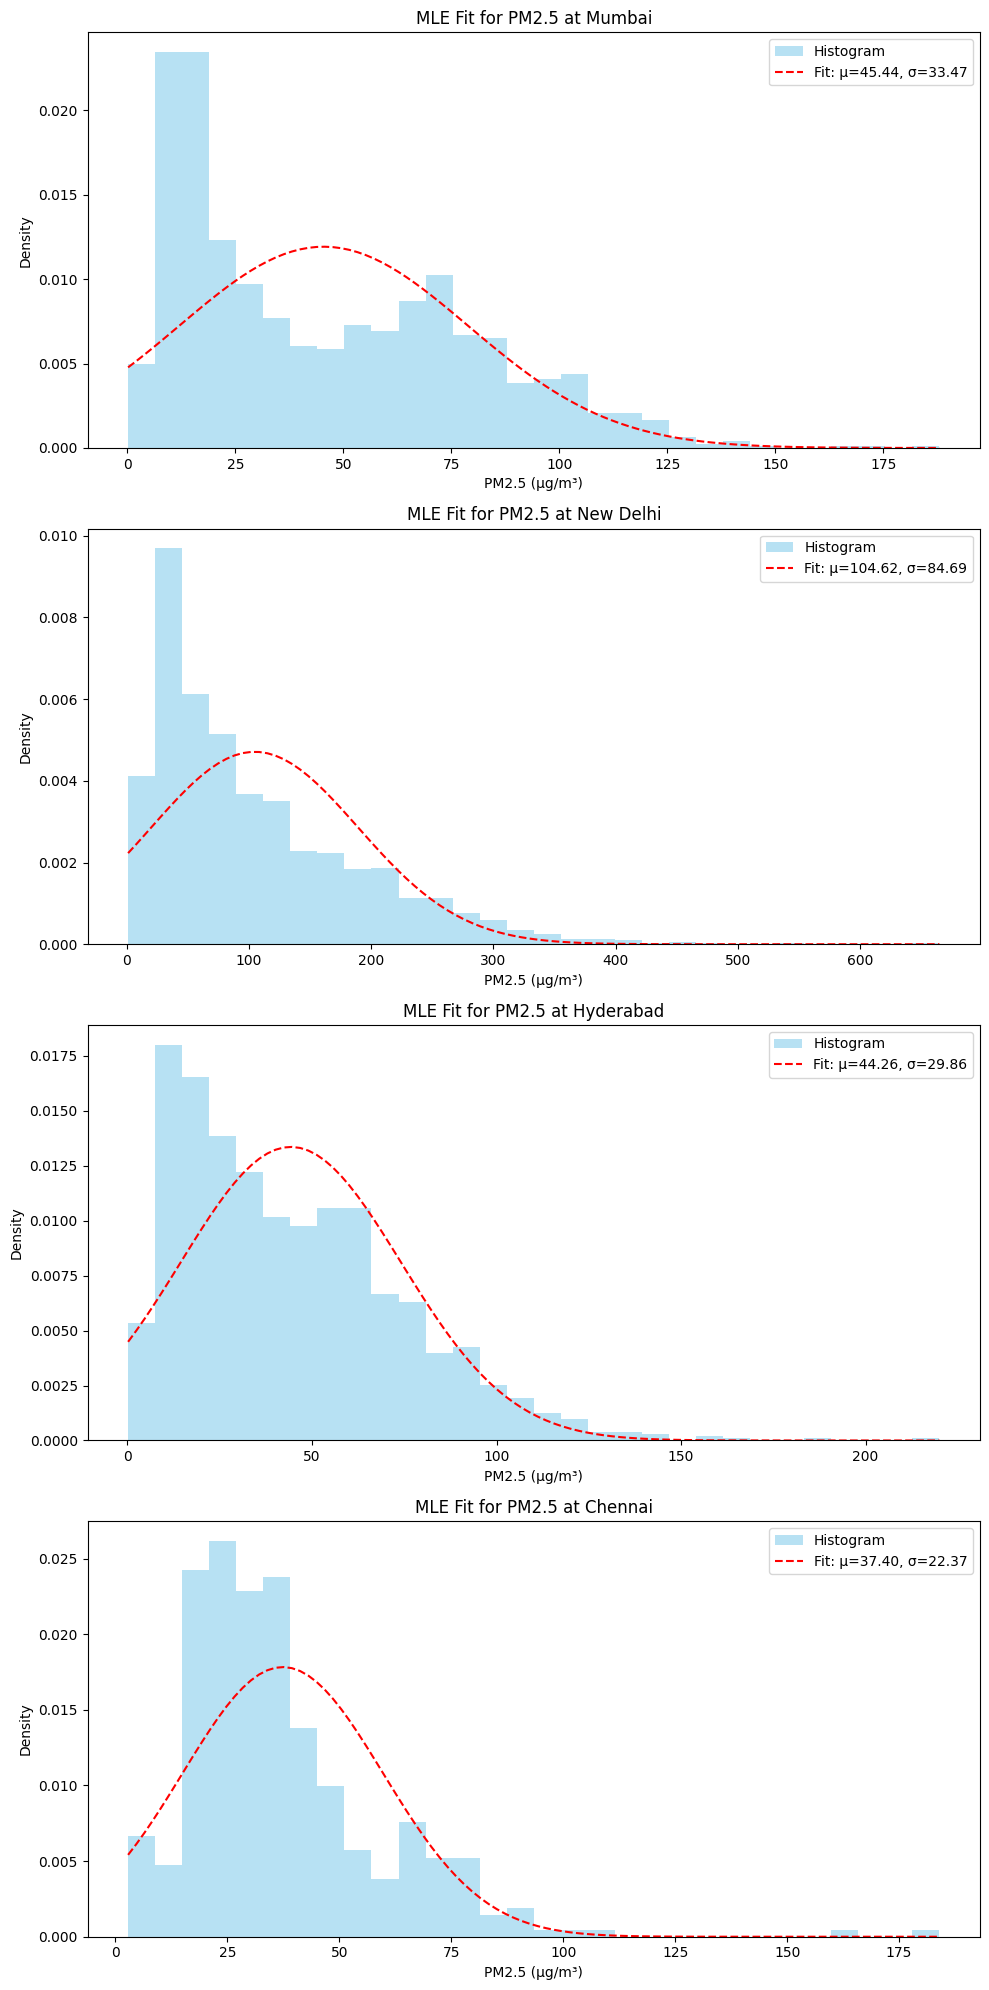

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Group by station and extract valid PM2.5 readings
stations = cleaned_df['name'].unique()

# Create subplots for visualizing MLE fit
fig, axes = plt.subplots(len(stations), 1, figsize=(10, 5 * len(stations)))
if len(stations) == 1:
    axes = [axes]  # Make it iterable

for i, station in enumerate(stations):
    station_data = cleaned_df[cleaned_df['name'] == station]['value']

    # Remove invalid or missing PM2.5 values
    station_data = station_data[station_data > 0].dropna()

    # Perform MLE - Estimate mean (mu) and standard deviation (sigma)
    mu, sigma = norm.fit(station_data)

    # Visualization
    ax = axes[i]
    n, bins, patches = ax.hist(station_data, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')

    # Plot PDF using estimated parameters
    x = np.linspace(min(bins), max(bins), 100)
    pdf = norm.pdf(x, mu, sigma)
    ax.plot(x, pdf, 'r--', label=f'Fit: μ={mu:.2f}, σ={sigma:.2f}')

    ax.set_title(f"MLE Fit for PM2.5 at {station}")
    ax.set_xlabel("PM2.5 (μg/m³)")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
cleaned_df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_pm25_location.csv', index=False)
print("cleaned data saved!")

cleaned data saved!


**From here it is a new work**

**Scaling Data**

**Create Sequences for LSTM**

**Build the LSTM Model**

**Train the Model**

next model

new work


**Data Preprocessing**

In [ ]:
import pandas as pd

# Load the dataset
df =cleaned_df

# Display top rows and columns
df.head()


,value,sensor_id,period.datetimeFrom.utc,period.datetimeFrom.local,period.datetimeTo.utc,period.datetimeTo.local,summary.min,summary.q02,summary.q25,summary.median,summary.q75,summary.q98,summary.max,summary.avg,summary.sd,name,locality,timezone,coordinates.latitude,coordinates.longitude,hour,dayofweek,month,sensor_id_encoded,station_name_encoded,pm25_category
0,101.0,23320,2019-12-31 18:30:00+00:00,2020-01-01 00:00:00+05:30,2020-01-01T18:30:00Z,2020-01-02T00:00:00+05:30,56.0,62.9,83.75,94.5,122.00,145.56,152.0,101.000000,25.604008,Mumbai,India,Asia/Kolkata,19.07283,72.88261,0,2,2020-01,0,2,Unhealthy
1,103.0,23320,2020-01-01 18:30:00+00:00,2020-01-02 00:00:00+05:30,2020-01-02T18:30:00Z,2020-01-03T00:00:00+05:30,40.0,40.0,81.75,107.0,131.25,156.32,160.0,102.958333,36.649312,Mumbai,India,Asia/Kolkata,19.07283,72.88261,0,3,2020-01,0,2,Unhealthy
2,92.9,23320,2020-01-02 18:30:00+00:00,2020-01-03 00:00:00+05:30,2020-01-03T18:30:00Z,2020-01-04T00:00:00+05:30,66.0,66.0,79.75,92.5,103.00,122.00,122.0,92.916667,17.196857,Mumbai,India,Asia/Kolkata,19.07283,72.88261,0,4,2020-01,0,2,Moderate
3,89.8,23320,2020-01-03 18:30:00+00:00,2020-01-04 00:00:00+05:30,2020-01-04T18:30:00Z,2020-01-05T00:00:00+05:30,57.0,57.0,70.00,94.5,99.75,126.00,126.0,89.750000,20.604453,Mumbai,India,Asia/Kolkata,19.07283,72.88261,0,5,2020-01,0,2,Moderate
4,81.3,23320,2020-01-04 18:30:00+00:00,2020-01-05 00:00:00+05:30,2020-01-05T18:30:00Z,2020-01-06T00:00:00+05:30,41.0,41.0,59.50,72.0,102.75,128.00,128.0,81.291667,30.175543,Mumbai,India,Asia/Kolkata,19.07283,72.88261,0,6,2020-01,0,2,Moderate


In [ ]:
# Check unique mappings
mapping = df[['sensor_id', 'name']].drop_duplicates()
print(mapping)


      sensor_id       name
0         23320     Mumbai
1815      23534  New Delhi
3633      24857  Hyderabad
5454    5077812    Chennai


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import timedelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [ ]:
df = cleaned_df

# Display top rows (corrected to print)
print("Top 5 rows of the initial DataFrame:")
print(df.head())

Top 5 rows of the initial DataFrame:
   value  sensor_id   period.datetimeFrom.utc period.datetimeFrom.local period.datetimeTo.utc    period.datetimeTo.local  summary.min  summary.q02  summary.q25  summary.median  summary.q75  summary.q98  summary.max  summary.avg  summary.sd    name locality      timezone  coordinates.latitude  coordinates.longitude  hour  dayofweek    month  sensor_id_encoded  station_name_encoded pm25_category
0  101.0      23320 2019-12-31 18:30:00+00:00 2020-01-01 00:00:00+05:30  2020-01-01T18:30:00Z  2020-01-02T00:00:00+05:30         56.0         62.9        83.75            94.5       122.00       145.56        152.0   101.000000   25.604008  Mumbai    India  Asia/Kolkata              19.07283               72.88261     0          2  2020-01                  0                     2     Unhealthy
1  103.0      23320 2020-01-01 18:30:00+00:00 2020-01-02 00:00:00+05:30  2020-01-02T18:30:00Z  2020-01-03T00:00:00+05:30         40.0         40.0        81.75          

In [ ]:
# --- Main Forecasting Script ---

# Load and Inspect Dataset (using the df from above)
df['datetime'] = pd.to_datetime(df['period.datetimeFrom.local'])

# Check Sensor ID -> Station Name Mapping
sensor_mapping = df[['sensor_id', 'name']].drop_duplicates()
print("\nSensor ID to Station Name Mapping (from main script):\n", sensor_mapping)

# Sort and Clean Data
# Ensure 'value' is numeric, coercing errors if necessary
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df = df.sort_values(['sensor_id', 'datetime']).dropna(subset=['value'])

# Parameters
n_input = 30  # Number of past time steps to use as input
n_output = 7  # Number of future time steps to predict



Sensor ID to Station Name Mapping (from main script):
       sensor_id       name
0         23320     Mumbai
1815      23534  New Delhi
3633      24857  Hyderabad
5454    5077812    Chennai



Found 4 unique sensor IDs to process.

--- Processing Station: Mumbai (Sensor ID: 23320) ---
Training model for Mumbai...
Epoch 1: Loss = 0.0390, MAE = 0.1451, Val_Loss = 0.0222, Val_MAE = 0.1166
Epoch 2: Loss = 0.0157, MAE = 0.0954, Val_Loss = 0.0221, Val_MAE = 0.1105
Epoch 3: Loss = 0.0143, MAE = 0.0886, Val_Loss = 0.0204, Val_MAE = 0.1067
Epoch 4: Loss = 0.0125, MAE = 0.0809, Val_Loss = 0.0202, Val_MAE = 0.1049
Epoch 5: Loss = 0.0119, MAE = 0.0782, Val_Loss = 0.0199, Val_MAE = 0.1038
Epoch 6: Loss = 0.0121, MAE = 0.0771, Val_Loss = 0.0192, Val_MAE = 0.1030
Epoch 7: Loss = 0.0115, MAE = 0.0762, Val_Loss = 0.0188, Val_MAE = 0.1032
Epoch 8: Loss = 0.0113, MAE = 0.0746, Val_Loss = 0.0188, Val_MAE = 0.1012
Epoch 9: Loss = 0.0112, MAE = 0.0748, Val_Loss = 0.0192, Val_MAE = 0.1017
Epoch 10: Loss = 0.0110, MAE = 0.0736, Val_Loss = 0.0184, Val_MAE = 0.0997
Epoch 11: Loss = 0.0110, MAE = 0.0739, Val_Loss = 0.0182, Val_MAE = 0.0998
Epoch 12: Loss = 0.0110, MAE = 0.0732, Val_Loss = 0.0181, Val

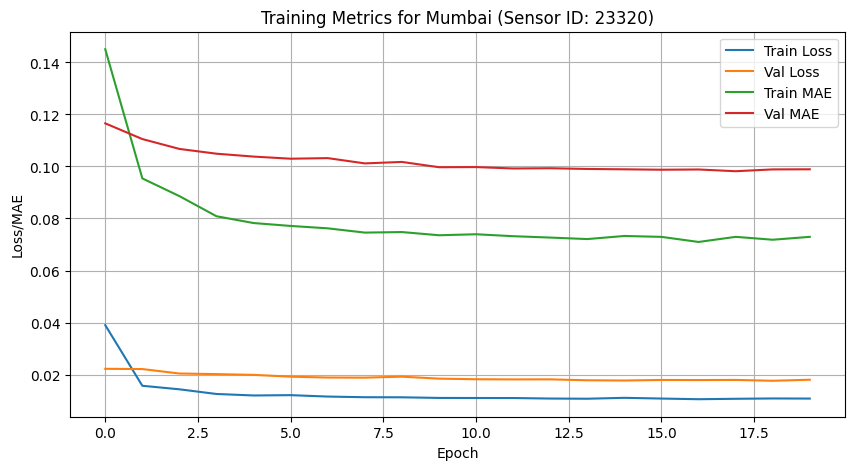

9/9 [==============================] - 0s 10ms/step
Validation MAE for Mumbai: 18.60
Validation RMSE for Mumbai: 25.22

--- Processing Station: New Delhi (Sensor ID: 23534) ---
Training model for New Delhi...
Epoch 1: Loss = 0.0160, MAE = 0.0908, Val_Loss = 0.0137, Val_MAE = 0.0834
Epoch 2: Loss = 0.0083, MAE = 0.0625, Val_Loss = 0.0142, Val_MAE = 0.0791
Epoch 3: Loss = 0.0078, MAE = 0.0584, Val_Loss = 0.0133, Val_MAE = 0.0772
Epoch 4: Loss = 0.0075, MAE = 0.0573, Val_Loss = 0.0132, Val_MAE = 0.0761
Epoch 5: Loss = 0.0070, MAE = 0.0555, Val_Loss = 0.0126, Val_MAE = 0.0754
Epoch 6: Loss = 0.0071, MAE = 0.0556, Val_Loss = 0.0125, Val_MAE = 0.0753
Epoch 7: Loss = 0.0070, MAE = 0.0567, Val_Loss = 0.0124, Val_MAE = 0.0770
Epoch 8: Loss = 0.0070, MAE = 0.0564, Val_Loss = 0.0124, Val_MAE = 0.0740
Epoch 9: Loss = 0.0067, MAE = 0.0547, Val_Loss = 0.0120, Val_MAE = 0.0752
Epoch 10: Loss = 0.0067, MAE = 0.0551, Val_Loss = 0.0120, Val_MAE = 0.0760
Epoch 11: Loss = 0.0067, MAE = 0.0548, Val_Loss = 

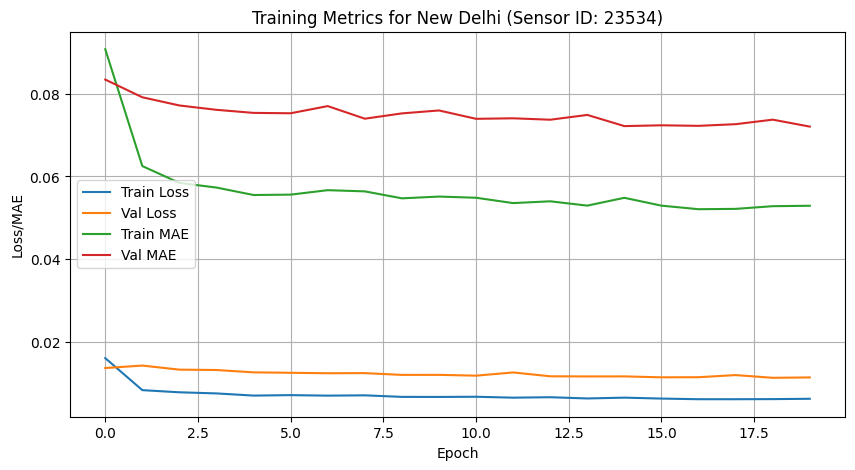

10/10 [==============================] - 0s 10ms/step
Validation MAE for New Delhi: 47.84
Validation RMSE for New Delhi: 70.82

--- Processing Station: Hyderabad (Sensor ID: 24857) ---
Training model for Hyderabad...
Epoch 1: Loss = 0.0238, MAE = 0.1175, Val_Loss = 0.0211, Val_MAE = 0.1087
Epoch 2: Loss = 0.0109, MAE = 0.0801, Val_Loss = 0.0210, Val_MAE = 0.1033
Epoch 3: Loss = 0.0102, MAE = 0.0754, Val_Loss = 0.0197, Val_MAE = 0.1033
Epoch 4: Loss = 0.0100, MAE = 0.0743, Val_Loss = 0.0194, Val_MAE = 0.1025
Epoch 5: Loss = 0.0101, MAE = 0.0740, Val_Loss = 0.0188, Val_MAE = 0.1031
Epoch 6: Loss = 0.0096, MAE = 0.0730, Val_Loss = 0.0187, Val_MAE = 0.1022
Epoch 7: Loss = 0.0093, MAE = 0.0716, Val_Loss = 0.0196, Val_MAE = 0.1004
Epoch 8: Loss = 0.0093, MAE = 0.0709, Val_Loss = 0.0184, Val_MAE = 0.1005
Epoch 9: Loss = 0.0091, MAE = 0.0703, Val_Loss = 0.0183, Val_MAE = 0.0998
Epoch 10: Loss = 0.0091, MAE = 0.0702, Val_Loss = 0.0183, Val_MAE = 0.1007
Epoch 11: Loss = 0.0091, MAE = 0.0704, Val

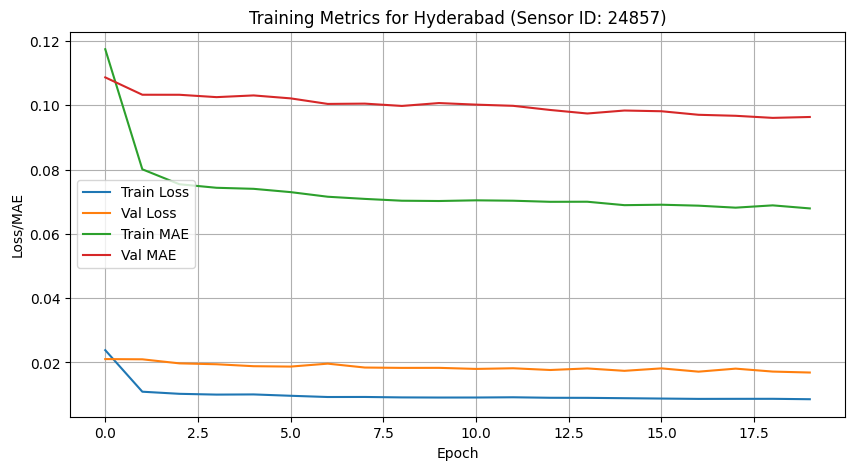

9/9 [==============================] - 0s 13ms/step
Validation MAE for Hyderabad: 21.19
Validation RMSE for Hyderabad: 28.56

--- Processing Station: Chennai (Sensor ID: 5077812) ---
Training model for Chennai...
Epoch 1: Loss = 0.0416, MAE = 0.1615, Val_Loss = 0.0593, Val_MAE = 0.2126
Epoch 2: Loss = 0.0279, MAE = 0.1168, Val_Loss = 0.0286, Val_MAE = 0.1360
Epoch 3: Loss = 0.0194, MAE = 0.0999, Val_Loss = 0.0192, Val_MAE = 0.1132
Epoch 4: Loss = 0.0156, MAE = 0.0825, Val_Loss = 0.0212, Val_MAE = 0.1163
Epoch 5: Loss = 0.0152, MAE = 0.0811, Val_Loss = 0.0185, Val_MAE = 0.1091
Epoch 6: Loss = 0.0150, MAE = 0.0839, Val_Loss = 0.0179, Val_MAE = 0.1083
Epoch 7: Loss = 0.0150, MAE = 0.0823, Val_Loss = 0.0195, Val_MAE = 0.1113
Epoch 8: Loss = 0.0150, MAE = 0.0808, Val_Loss = 0.0179, Val_MAE = 0.1084
Epoch 9: Loss = 0.0148, MAE = 0.0845, Val_Loss = 0.0178, Val_MAE = 0.1084
Epoch 10: Loss = 0.0147, MAE = 0.0786, Val_Loss = 0.0197, Val_MAE = 0.1118
Epoch 11: Loss = 0.0145, MAE = 0.0785, Val_Los

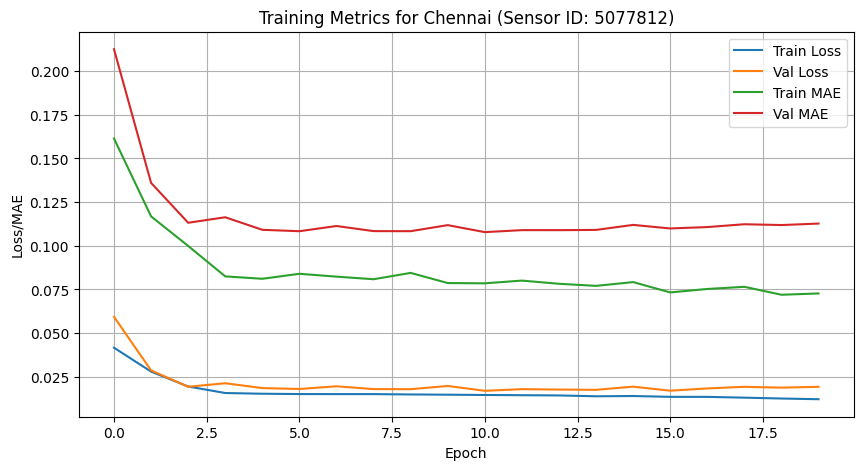

2/2 [==============================] - 0s 14ms/step
Validation MAE for Chennai: 20.42
Validation RMSE for Chennai: 25.10


In [ ]:
# Create Sequences Function
def create_sequences(series, n_input, n_output):
    X, y = [], []
    # Ensure there's enough data for at least one sequence
    if len(series) >= n_input + n_output:
        for i in range(n_input, len(series) - n_output + 1): # Adjusted loop boundary
            X.append(series[i - n_input:i])
            y.append(series[i:i + n_output])
    return np.array(X), np.array(y)

# Build Model Function
def build_model(n_input, n_output):
    model = Sequential([
        LSTM(64, activation='relu', return_sequences=True, input_shape=(n_input, 1)),
        Dropout(0.2),
        LSTM(64, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(n_output)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Custom Callback for Per-Epoch Metrics
class EpochLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f"Epoch {epoch+1}: Loss = {logs.get('loss', 'N/A'):.4f}, MAE = {logs.get('mae', 'N/A'):.4f}, "
              f"Val_Loss = {logs.get('val_loss', 'N/A'):.4f}, Val_MAE = {logs.get('val_mae', 'N/A'):.4f}")

# Forecast Loop per Station
results = []

unique_sensor_ids = df['sensor_id'].unique()
print(f"\nFound {len(unique_sensor_ids)} unique sensor IDs to process.")

for sensor_id in unique_sensor_ids:
    station_df = df[df['sensor_id'] == sensor_id].copy()

    if station_df.empty:
        print(f"No data for Sensor ID: {sensor_id}. Skipping...")
        continue

    station_name = station_df['name'].iloc[0]
    print(f"\n--- Processing Station: {station_name} (Sensor ID: {sensor_id}) ---")

    if len(station_df['value']) < (n_input + n_output + 10): # Ensure we check length of 'value' series
        print(f"Not enough data for {station_name} (Sensor ID: {sensor_id}) to create sequences and split. "
              f"Required: {n_input + n_output + 10}, Available: {len(station_df['value'])}. Skipping...")
        continue

    # Scale
    scaler = MinMaxScaler()
    station_df['scaled'] = scaler.fit_transform(station_df[['value']])

    # Create sequences
    X, y = create_sequences(station_df['scaled'].values, n_input, n_output)

    if X.size == 0 or y.size == 0: # Check if sequences were actually created
        print(f"Could not create sequences for {station_name} (Sensor ID: {sensor_id}). "
              f"Available data points after cleaning: {len(station_df['scaled'])}. Skipping...")
        continue

    split_ratio = 0.8
    split = int(split_ratio * len(X))

    # Ensure there's enough data for both training and validation sets
    if split < 1 or (len(X) - split) < 1:
        print(f"Not enough sequences to perform train/validation split for {station_name} (Sensor ID: {sensor_id}). "
              f"Total sequences: {len(X)}. Skipping...")
        continue

    X_train, X_val = X[:split], X[split:]
    y_train, y_val = y[:split], y[split:]

    # Reshape
    X_train = X_train.reshape((-1, n_input, 1))
    X_val = X_val.reshape((-1, n_input, 1))

    # Build & Train Model
    model = build_model(n_input, n_output)
    print(f"Training model for {station_name}...")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20, batch_size=32,
        callbacks=[EpochLogger()], verbose=0 # verbose=0 because EpochLogger handles output
    )

    # Plot Loss/MAE
    plt.figure(figsize=(10,5)) # Adjusted figure size
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Val Loss')
    plt.plot(history.history['mae'], label='Train MAE')
    if 'val_mae' in history.history:
        plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title(f"Training Metrics for {station_name} (Sensor ID: {sensor_id})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss/MAE")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predict Future
    last_seq_scaled = station_df['scaled'].values[-n_input:] # Ensure this is from scaled values
    if len(last_seq_scaled) < n_input:
        print(f"Not enough data in the tail end for final prediction for {station_name}. Skipping prediction step.")
        continue
    last_seq_reshaped = last_seq_scaled.reshape(1, n_input, 1)
    pred_scaled = model.predict(last_seq_reshaped)[0]
    pred_actual = scaler.inverse_transform(pred_scaled.reshape(-1, 1)).flatten()

    # Evaluation on Validation Set
    y_val_pred_scaled = model.predict(X_val)
    # Ensure y_val_pred_scaled and y_val have compatible shapes for inverse_transform and metrics
    y_val_pred_actual = scaler.inverse_transform(y_val_pred_scaled) # Reshape handled by MinMaxScaler if y has multiple outputs
    y_val_true_actual = scaler.inverse_transform(y_val)

    mae = mean_absolute_error(y_val_true_actual, y_val_pred_actual)
    rmse = np.sqrt(mean_squared_error(y_val_true_actual, y_val_pred_actual))
    print(f"Validation MAE for {station_name}: {mae:.2f}")
    print(f"Validation RMSE for {station_name}: {rmse:.2f}")

    # Forecast Dates
    last_date = station_df['datetime'].max()

    offsets = ['Tomorrow-3 (Day1)', 'Tomorrow-2 (Day2)', 'Tomorrow-1 (Day3)', 'Tomorrow (Day4)',
               'Tomorrow+1 (Day5)', 'Tomorrow+2 (Day6)', 'Tomorrow+3 (Day7)']

    forecast_dates = [last_date + timedelta(days=i+1) for i in range(n_output)]

    station_forecast = pd.DataFrame({
        'station_name': station_name,
        'sensor_id': sensor_id,
        'forecast_date': forecast_dates,
        'predicted_pm25': pred_actual,

    })
    results.append(station_forecast)



In [ ]:
#  Final Forecast DataFrame
if results: # Check if results list is not empty
    forecast_result = pd.concat(results).reset_index(drop=True)

    # 🌬️ Add PM2.5 Condition Category
    def get_pm25_condition(pm25_value):
        if pd.isna(pm25_value):
            return "Unknown"
        if pm25_value <= 30:
            return "Good"
        elif pm25_value <= 60:
            return "Satisfactory"
        elif pm25_value <= 90:
            return "Moderate"
        elif pm25_value <= 120:
            return "Poor"
        elif pm25_value <= 250:
            return "Very Poor"
        else:
            return "Severe"

    forecast_result['pm25_condition'] = forecast_result['predicted_pm25'].apply(get_pm25_condition)


######################################################################################################################
    Mumbai_forecast = forecast_result[forecast_result['station_name'].str.contains("Mumbai", case=False, na=False)]
    if not Mumbai_forecast.empty:
        print("\n--- Forecast for Mumbai Stations ---")
        print(Mumbai_forecast)
    else:
        print("\nNo station with 'Mumbai' in its name found in the forecast results.")
        print("Ensure Mumbai data is present in your 'cleaned_df' with a recognizable name.")

    New_Delhi_forecast = forecast_result[forecast_result['station_name'].str.contains("New Delhi", case=False, na=False)]
    if not New_Delhi_forecast.empty:
        print("\n--- Forecast for New Delhi Stations ---")
        print(New_Delhi_forecast)
    else:
        print("\nNo station with 'New Delhi' in its name found in the forecast results.")
        print("Ensure New Delhi data is present in your 'cleaned_df' with a recognizable name.")


    Hyderabad_forecast = forecast_result[forecast_result['station_name'].str.contains("Hyderabad", case=False, na=False)]
    if not Hyderabad_forecast.empty:
        print("\n--- Forecast for Hyderabad Stations ---")
        print(Hyderabad_forecast)
    else:
        print("\nNo station with 'Hyderabad' in its name found in the forecast results.")
        print("Ensure Hyderabad data is present in your 'cleaned_df' with a recognizable name.")

    chennai_forecast = forecast_result[forecast_result['station_name'].str.contains("Chennai", case=False, na=False)]
    if not chennai_forecast.empty:
        print("\n--- Forecast for Chennai Stations ---")
        print(chennai_forecast)
    else:
        print("\nNo station with 'Chennai' in its name found in the forecast results.")
        print("Ensure Chennai data is present in your 'cleaned_df' with a recognizable name.")

else:
    print("\nNo forecast results were generated. This might be due to insufficient data for all stations.")


--- Forecast for Mumbai Stations ---
  station_name  sensor_id             forecast_date  predicted_pm25 pm25_condition
0       Mumbai      23320 2025-02-25 00:00:00+05:30       55.848312   Satisfactory
1       Mumbai      23320 2025-02-26 00:00:00+05:30       54.894436   Satisfactory
2       Mumbai      23320 2025-02-27 00:00:00+05:30       57.783978   Satisfactory
3       Mumbai      23320 2025-02-28 00:00:00+05:30       56.843662   Satisfactory
4       Mumbai      23320 2025-03-01 00:00:00+05:30       56.747166   Satisfactory
5       Mumbai      23320 2025-03-02 00:00:00+05:30       56.524479   Satisfactory
6       Mumbai      23320 2025-03-03 00:00:00+05:30       58.870342   Satisfactory

--- Forecast for New Delhi Stations ---
   station_name  sensor_id             forecast_date  predicted_pm25 pm25_condition
7     New Delhi      23534 2025-02-25 00:00:00+05:30       63.488018       Moderate
8     New Delhi      23534 2025-02-26 00:00:00+05:30       62.159210       Moderate
9    

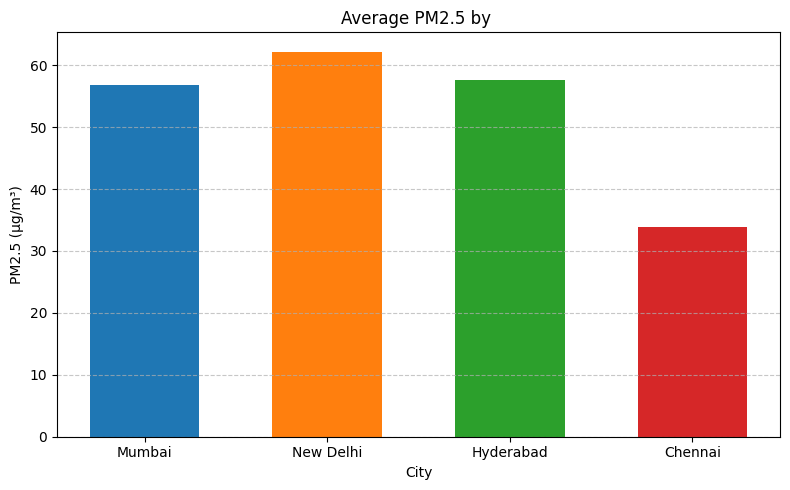

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming forecast_result DataFrame is already created as shown in the notebook
# Calculate average PM2.5 for each city
cities = ["Mumbai", "New Delhi", "Hyderabad", "Chennai"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Distinct colors for each city
avg_pm25 = []

# Compute average PM2.5 for each city
for city in cities:
    city_forecast = forecast_result[forecast_result['station_name'].str.contains(city, case=False, na=False)]
    if not city_forecast.empty:
        avg = city_forecast['predicted_pm25'].mean()
        avg_pm25.append(avg)
    else:
        avg_pm25.append(0)  # In case a city has no data

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(cities, avg_pm25, color=colors, width=0.6)

# Customize the plot with today's timestamp
plt.title("Average PM2.5 by ")
plt.xlabel("City")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()